# Work Calculation Diagram

The following code calls from two modules to create the plots required to construct a diagram for workc calculation. 

The first module (augment_data) takes raw HEKA exported .asc files and preprocesses the data creating an augmented data table with additional calculated columns.
The second module (diagram_figs) contains the required predefined plotting functions.

The plots are saved individually and the final diagram is constructed by adding additional elements in Illustrator.

## Plots of position and force vs time traces

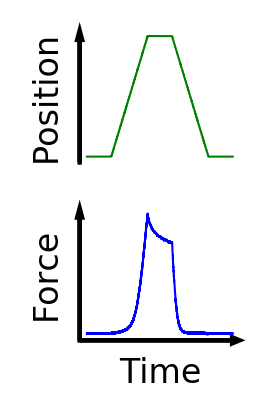

In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import augment_data as ad
import diagram_figs as df

path = 'diagrams/20200303_hek293t_mp1_c6'
augmented_dat = ad.augment_file(path, 8, [50,150])
augmented_dat.to_hdf(path + '_augmented.h5', key='df', mode='w')

grps = augmented_dat.groupby('sweep')

axA = df.reptrace_plot('diagrams/work_calcA',grps, 8, ['position','force'], rois = [650,1250])


## XY plot of force as a function of position

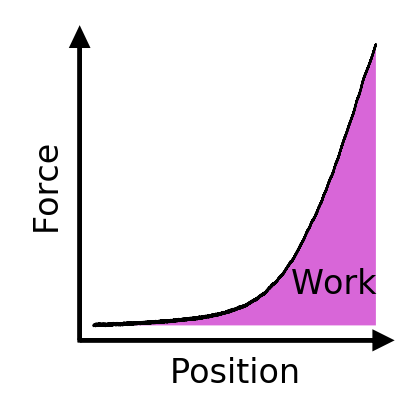

In [2]:
axB = df.xy_plot('diagrams/work_calcB', grps, 8, ['position', 'force'], integrate = True)


## Plot of work vs time trace

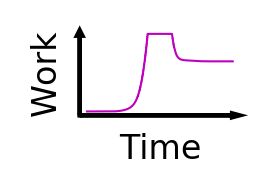

In [3]:
axC = df.reptrace_plot('diagrams/work_calcC',grps, 8, ['work'], rois = [650,1250])

## Final Figure

Arrows showing workflow of analysis are added in illustrator creating the final figure.

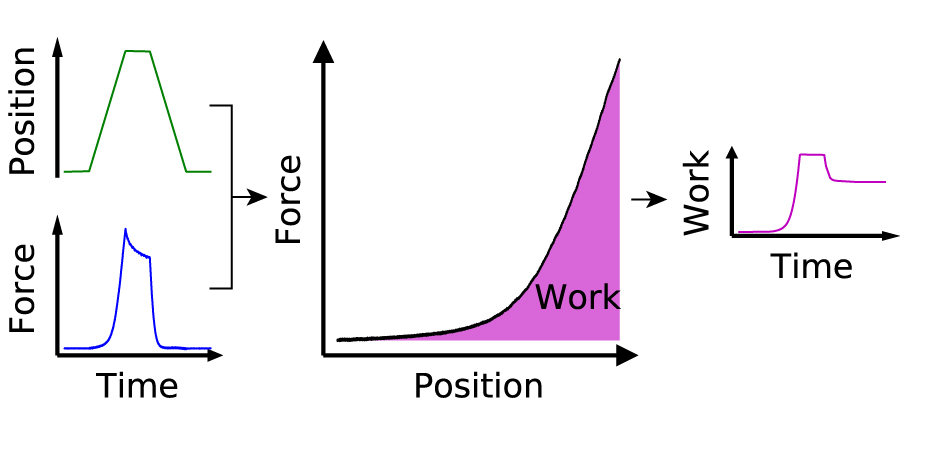

In [13]:
from IPython.display import Image 

im = Image(filename='figures/work_calc_fin.jpg')
display(im)